In [1]:
from sklearn import tree
import cv2 
import os
import glob
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
img_dir_amaro = "FACD_image/FACD_image/Amaro"
img_dir_origin = "FACD_image/FACD_image/Origin"
img_dir_lofi = "FACD_image/FACD_image/Lofi"
shape = (244,244)
random_state = 42


data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []
test_image = "4656565465"
#test_image= "601122" #ignore this picture during fit phase

for f1 in files_origin:
    if test_image in f1:
        continue
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    if test_image in f1:
        continue
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    if test_image in f1:
        continue
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 

In [3]:
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin, data_lofi))
y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=20, random_state=random_state)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [4]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(classifier, X_full, y_full, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
y_pred = classifier.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

Accuracy: 0.947 (0.012)
              precision    recall  f1-score   support

       amaro       0.95      0.94      0.94       272
        lofi       0.94      0.92      0.93       246
      origin       0.97      1.00      0.99       250

    accuracy                           0.95       768
   macro avg       0.95      0.95      0.95       768
weighted avg       0.95      0.95      0.95       768



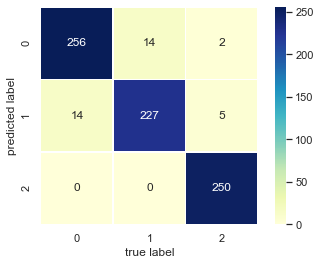

In [11]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'})
plt.xlabel('true label')
plt.ylabel('predicted label');